# Analyse de la Fonction Quadratique
**Fonction :** $f(x, y) = x^2 - y^2$

1.  **Condition du 1er ordre ($\nabla f = 0$) :**
    $$\nabla f(x) = \begin{pmatrix} 2x \\ -2y \end{pmatrix}$$
    Le seul point critique est $(0,0)$.

2.  **Condition du 2nd ordre (Hessienne) :**
    $$H_f(x) = \begin{pmatrix} 2 & 0 \\ 0 & -2 \end{pmatrix}$$
    Les valeurs propres sont $\lambda_1 = 2$ et $\lambda_2 = -2$.
    La matrice est **indéfinie** (une valeur positive, une négative). Ce n'est ni un minimum, ni un maximum, c'est un **Point Selle**.

**Hypothèse :** Un algorithme de minimisation (descente de gradient) devrait diverger vers $-\infty$ le long de l'axe $y$ (car $-y^2$ n'est pas borné inférieurement), sauf si on part exactement sur l'axe $x$.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
import time

plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

In [5]:
def quadratic(X):
    x, y = X
    return x**2 - y**2

def grad_quadratic(X):
    x, y = X
    # df/dx = 2x
    df_dx = 2 * x
    # df/dy = -2y
    df_dy = -2 * y
    return np.array([df_dx, df_dy])

def hessian_quadratic(X):
    return np.array([[2, 0], [0, -2]])

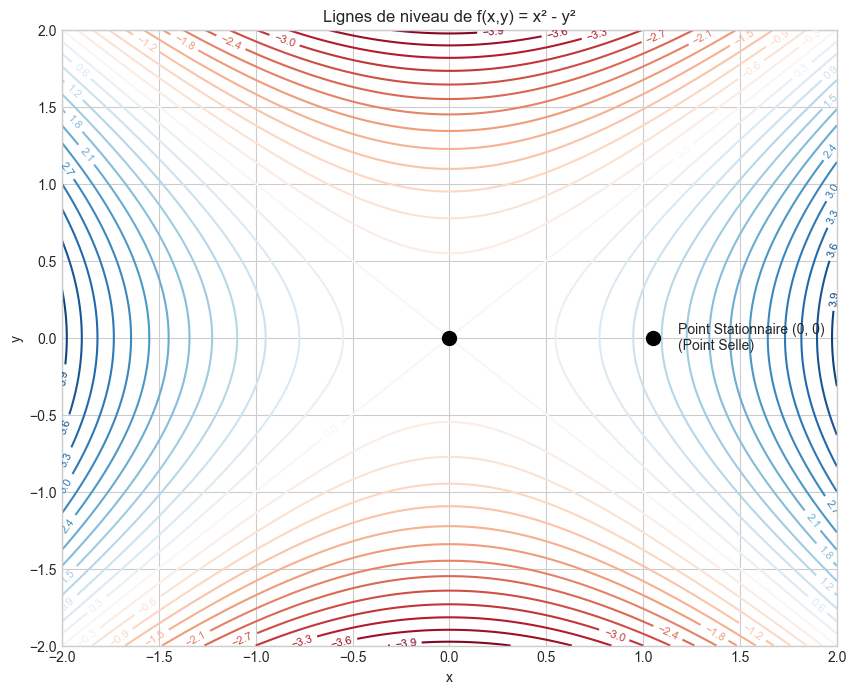

In [6]:
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = quadratic([X, Y])

plt.figure(figsize=(10, 8))
contours = plt.contour(X, Y, Z, levels=30, cmap='RdBu')
plt.clabel(contours, inline=True, fontsize=8)

# Point stationnaire
plt.plot(0, 0, 'ko', markersize=10, label='Point Stationnaire (0, 0)\n(Point Selle)')

plt.title('Lignes de niveau de f(x,y) = x² - y²')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [8]:
def gradient_descent_fixed(start_point, pas, num_iter, tol=1e-6):
    x = np.array(start_point)
    history = [x.copy()]
    start_time = time.time()

    for i in range(num_iter):
        grad = grad_quadratic(x)
        
        # Condition d'arrêt sur la norme du gradient
        if np.linalg.norm(grad) < tol:
            break
            
        # Mise à jour
        x = x - pas * grad
        history.append(x.copy())
        
        if np.linalg.norm(x) > 1e4:
            print("Divergence détectée ! Arrêt de l'algorithme.")
            break
        
    end_time = time.time()
    return np.array(history), end_time - start_time

def gradient_descent_optimal(start_point, num_iter, tol=1e-6):
    x = np.array(start_point)
    history = [x.copy()]
    start_time = time.time()

    for i in range(num_iter):
        grad = grad_quadratic(x)
        
        if np.linalg.norm(grad) < tol:
            break

        # Recherche linéaire du pas optimal
        def func_to_minimize(s):
            return quadratic(x - s * grad)

        # Bornes pour la recherche du pas
        res = minimize_scalar(func_to_minimize, bounds=(0, 1), method='bounded')
        optimal_step = res.x

        x = x - optimal_step * grad
        history.append(x.copy())
        
        if np.linalg.norm(x) > 1e4:
            print("Divergence détectée ! Arrêt de l'algorithme.")
            break

    end_time = time.time()
    return np.array(history), end_time - start_time

### Cas 1 : Départ sur l'axe des X $(x=1.8, y=0)$
Théoriquement, la dérivée par rapport à $y$ est nulle ($-2y = 0$). L'algorithme ne "voit" que la partie convexe $x^2$ et devrait converger vers $(0,0)$.

In [10]:
start_stable = [1.8, 0.0]
lr = 0.1
path_stable, time_stable = gradient_descent_fixed(start_stable, lr, 100)

print(f"--- Départ sur l'axe stable {start_stable} ---")
print(f"Point final: {path_stable[-1]}")
print(f"Valeur finale f(x): {quadratic(path_stable[-1]):.6f}")

--- Départ sur l'axe stable [1.8, 0.0] ---
Point final: [4.62798157e-07 0.00000000e+00]
Valeur finale f(x): 0.000000


### Cas 2 : Départ hors de l'axe des X $(x=0.1, y=0.5)$
Ici, $y \neq 0$. Comme on cherche à **minimiser** $f(x,y) = x^2 - y^2$, le gradient par rapport à $y$ est $-2y$.
La mise à jour est $y_{k+1} = y_k - \alpha (-2y_k) = y_k(1 + 2\alpha)$.
La valeur absolue de $y$ va augmenter exponentiellement. L'algorithme va "dévaler" la pente de la selle vers $-\infty$.

In [11]:
start_unstable = [0.1, 0.5]

path_div, time_div = gradient_descent_fixed(start_unstable, lr, 50)

print(f"--- Départ instable {start_unstable} ---")
print(f"Point final: {path_div[-1]}")
print(f"Valeur finale f(x): {quadratic(path_div[-1]):.6f}")

--- Départ instable [0.1, 0.5] ---
Point final: [1.42724769e-06 4.55021908e+03]
Valeur finale f(x): -20704493.630504


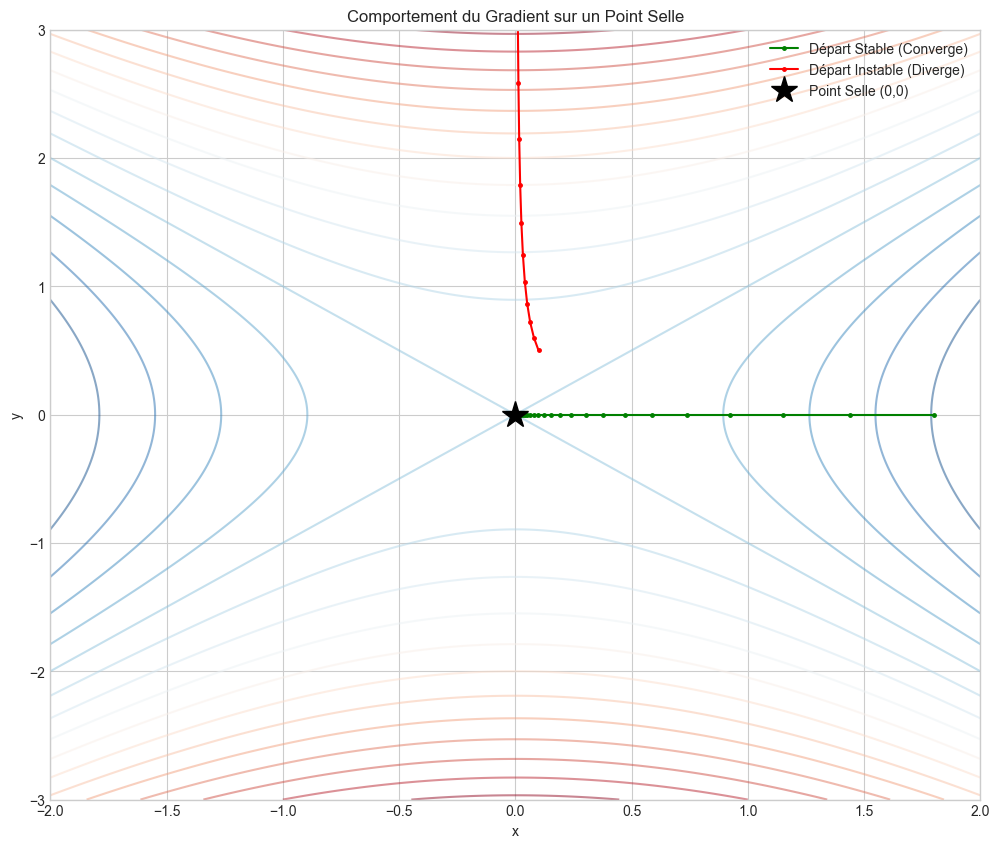

In [12]:
plt.figure(figsize=(12, 10))

# Fond de carte (Lignes de niveau)
X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-3, 3, 400))
Z = quadratic([X, Y])
plt.contour(X, Y, Z, levels=20, cmap='RdBu', alpha=0.5)

# Trajectoire Stable
plt.plot(path_stable[:, 0], path_stable[:, 1], 'g.-', label='Départ Stable (Converge)', markersize=5)

# Trajectoire Instable
plt.plot(path_div[:, 0], path_div[:, 1], 'r.-', label='Départ Instable (Diverge)', markersize=5)

plt.plot(0, 0, 'k*', markersize=20, label='Point Selle (0,0)')

plt.title('Comportement du Gradient sur un Point Selle')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.xlim(-2, 2)
plt.ylim(-3, 3)
plt.show()

### Analyse et observations

1.  **Échec de la condition suffisante :**
    Le point $(0,0)$ vérifie la condition nécessaire du 1er ordre ($\nabla f = 0$). Cependant, la matrice Hessienne (calculée au début) possède des valeurs propres positives ($2$) et négatives ($-2$).
    * Ce n'est pas un extremum local, mais un **point selle**.
    * La fonction n'est pas convexe (ni concave) globalement.

2.  **Comportement numérique :**
    * L'algorithme de gradient cherche à minimiser la fonction.
    * Sur la direction $x$ (valeur propre $>0$), la fonction est convexe : l'algorithme converge vers 0.
    * Sur la direction $y$ (valeur propre $<0$), la fonction est concave : l'algorithme diverge vers $-\infty$ car il n'y a pas de minimum global.

3.  **Conclusion :**
    Pour une fonction non-convexe comme celle-ci, la convergence vers le point critique dépend entièrement du point de départ. Le gradient seul ne suffit pas à garantir la stabilité si la Hessienne n'est pas définie positive.